In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/train.csv
/kaggle/input/titanic-dataset/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train= pd.read_csv("/kaggle/input/titanic-dataset/train.csv")
test= pd.read_csv("/kaggle/input/titanic-dataset/test.csv")



In [4]:
#Pclass: 1= upper, 2= middle, 3= lower
#Sibsp= total number of passenger's siblings and spouse
#Parch= total number of passenger's parents and childrens


train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("Number of training samples (rows, columns)= ", train.shape)
print("Number of testing samples (rows, columns)= ", test.shape)
print("\nColumns in training dataset: ", train.columns)
print("\nColumns in testing dataset: ", test.columns)

Number of training samples (rows, columns)=  (891, 12)
Number of testing samples (rows, columns)=  (418, 11)

Columns in training dataset:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Columns in testing dataset:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

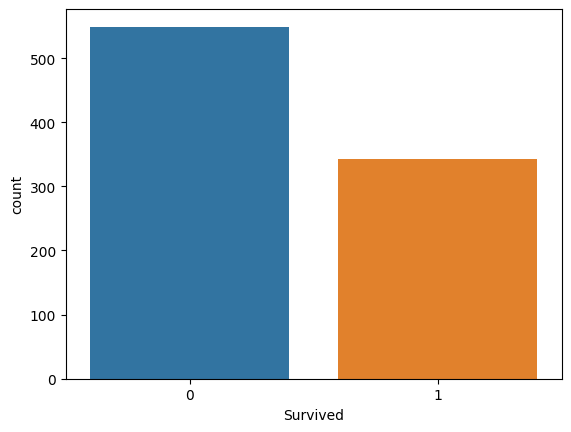

In [11]:
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Pclass', ylabel='Survived'>

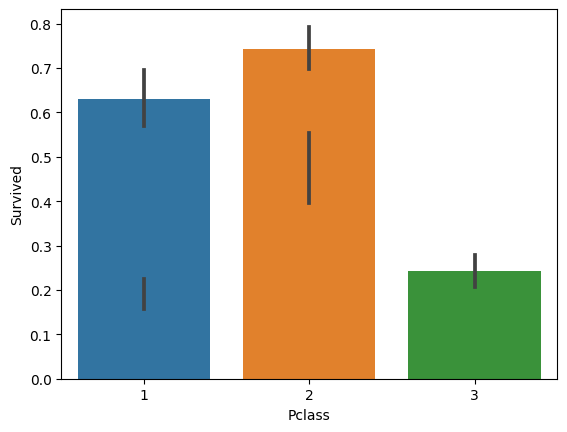

In [12]:
sns.barplot(x='Sex', y='Survived', data=train)
sns.barplot(x='Pclass', y='Survived', data=train)

In [13]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(train['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_31/985617029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipykernel_31/985617029.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [14]:
#We have basically extracted all titles here 

train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("Here is the all the titles associated with names: ", train['Title'].unique())



#If we take a look at the prints, there are too many titles that only occur once or twice in the entire dataset. This will generalize the model too much so we categorize them under a single title "Rare"

rare_titles = ['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer']
train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')


#Here, we are mapping titles to integers
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare':0}

train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

# Fill any missing values (in case of unknowns)
train['Title'].fillna(0, inplace=True)
test['Title'].fillna(0, inplace=True)





#The idea is to drop the names but keep the titles as it has a correlation with survival rate
train= train.drop(columns=["Cabin", "Name", "Ticket", "Fare"], axis=1) #remmber to add fare again to this list if fare per person feature engineering does not work 
test= test.drop(columns=["Cabin", "Name", "Ticket", "Fare"], axis=1)

train.head()

Here is the all the titles associated with names:  ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


/tmp/ipykernel_31/2657422688.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Title'].fillna(0, inplace=True)
/tmp/ipykernel_31/2657422688.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,3
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,3
4,5,0,3,male,35.0,0,0,S,1


In [15]:
#We are creating a new column titled 'FamilySize' that basically combines the entire family including siblings and parents on board. 

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1  # +1 for self
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

#Conversely, we will drop the sibp and parch columns to avoid redundancy here since
train=train.drop(columns=["SibSp", "Parch"])
test=test.drop(columns=["SibSp", "Parch"])


train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,FamilySize
0,1,0,3,male,22.0,S,1,2
1,2,1,1,female,38.0,C,3,2
2,3,1,3,female,26.0,S,2,1
3,4,1,1,female,35.0,S,3,2
4,5,0,3,male,35.0,S,1,1


In [16]:
#Testing this theory out to see if dropping passenger id improves accuracy 
train=train.drop(columns=["PassengerId"])

In [17]:
train["Sex"]= train["Sex"].replace({"male": 1, "female": 0})
test["Sex"]= test["Sex"].replace({"male": 1, "female": 0})

train["Embarked"]= train["Embarked"].replace({"C": 0, "Q": 1, "S": 2})
test["Embarked"]= test["Embarked"].replace({"C": 0, "Q": 1, "S": 2})

/tmp/ipykernel_31/3322063886.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train["Sex"]= train["Sex"].replace({"male": 1, "female": 0})
/tmp/ipykernel_31/3322063886.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test["Sex"]= test["Sex"].replace({"male": 1, "female": 0})
/tmp/ipykernel_31/3322063886.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, s

In [18]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,FamilySize
0,0,3,1,22.0,2,1,2
1,1,1,0,38.0,0,3,2
2,1,3,0,26.0,2,2,1
3,1,1,0,35.0,2,3,2
4,0,3,1,35.0,2,1,1


In [19]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,FamilySize
0,892,3,1,34.5,1,1.0,1
1,893,3,0,47.0,2,3.0,2
2,894,2,1,62.0,1,1.0,1
3,895,3,1,27.0,2,1.0,1
4,896,3,0,22.0,2,3.0,3


In [20]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']

In [21]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as sk
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=1000))  # liblinear supports L1
])

param_grid = {
    'logreg__penalty': ['l1', 'l2'],  # try both L1 and L2
    'logreg__C': [0.01, 0.1, 1, 10, 100]  # smaller C = more regularization
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)


print("✅ Best Parameters Found:", grid_search.best_params_)
print("✅ Best Cross-Validated Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))



✅ Best Parameters Found: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
✅ Best Cross-Validated Accuracy: 82.71%


In [22]:
X_test = test.drop(columns=['PassengerId'])  # keep this line
X_test_scaled = grid_search.best_estimator_.named_steps['scaler'].transform(X_test)

predictions = grid_search.best_estimator_.named_steps['logreg'].predict(X_test_scaled)

In [23]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})


In [24]:
submission.to_csv('submission.csv', index=False)